In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [5]:
company = pd.read_csv("C:/Users/HP/Downloads/Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
company.shape

(400, 11)

In [9]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [11]:
label_encoder

LabelEncoder()

In [12]:
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [13]:
company['value']= company['Sales'].apply(lambda Sales: 'High' if Sales <=7.49 else 'Low')

In [14]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,value
0,9.50,138,73,11,276,120,0,42,17,1,1,Low
1,11.22,111,48,16,260,83,1,65,10,1,1,Low
2,10.06,113,35,10,269,80,2,59,12,1,1,Low
3,7.40,117,100,4,466,97,2,55,14,1,1,High
4,4.15,141,64,3,340,128,0,38,13,1,0,High


In [15]:
company.drop(['Sales'],axis=1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,value
0,138,73,11,276,120,0,42,17,1,1,Low
1,111,48,16,260,83,1,65,10,1,1,Low
2,113,35,10,269,80,2,59,12,1,1,Low
3,117,100,4,466,97,2,55,14,1,1,High
4,141,64,3,340,128,0,38,13,1,0,High
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,Low
396,139,23,3,37,120,2,55,11,0,1,High
397,162,26,12,368,159,2,40,18,1,1,High
398,100,79,7,284,95,0,50,12,1,1,High


In [16]:
company['value'] = label_encoder.fit_transform(company['value'])

In [17]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
 11  value        400 non-null    int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 31.4 KB


In [18]:
x = company.iloc[:,1:11]
y = company.iloc[:,11]

In [19]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [20]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: value, Length: 400, dtype: int32

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=40)

In [22]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=11)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [23]:
model.get_n_leaves()

42

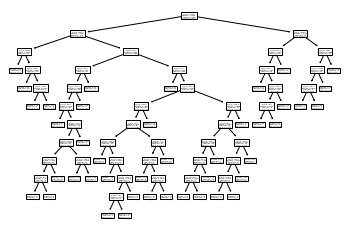

In [24]:
#plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [25]:
#Predicting on test data
preds= model.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(preds==y_test))

Test data Accuracy is: 0.675


In [26]:
#Predicting on train data
predt= model.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(predt==y_train))

Train data Accuracy is: 1.0


In [27]:
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8174999999999999


In [28]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8024999999999999


In [29]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier




num_trees = 10
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7825


In [30]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7925


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [32]:
fraud = pd.read_csv("C:/Users/HP/Downloads/Fraud_check.csv")

In [33]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [34]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [35]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [36]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [37]:
f1 = fraud.rename({'Marital.Status': 'MarStat','Taxable.Income': 'TaxInc','City.Population': 'CityPop','Work.Experience':'WorkExp'},axis=1)
f1

,Undergrad,MarStat,TaxInc,CityPop,WorkExp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [38]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()

In [39]:
f1['Undergrad'] = label_encoder.fit_transform(f1['Undergrad'])
f1['MarStat'] = label_encoder.fit_transform(f1['MarStat'])
f1['Urban'] = label_encoder.fit_transform(f1['Urban'])
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Undergrad  600 non-null    int32
 1   MarStat    600 non-null    int32
 2   TaxInc     600 non-null    int64
 3   CityPop    600 non-null    int64
 4   WorkExp    600 non-null    int64
 5   Urban      600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [40]:
f1['Tax']= f1['TaxInc'].apply(lambda TaxInc : 'Risky' if TaxInc<=30000 else 'Good')

In [41]:
f1

,Undergrad,MarStat,TaxInc,CityPop,WorkExp,Urban,Tax
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [42]:
f1=f1.drop(['TaxInc'],axis=1)
f1

,Undergrad,MarStat,CityPop,WorkExp,Urban,Tax
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [43]:
f1['Tax'] = label_encoder.fit_transform(f1['Tax'])

In [44]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Undergrad  600 non-null    int32
 1   MarStat    600 non-null    int32
 2   CityPop    600 non-null    int64
 3   WorkExp    600 non-null    int64
 4   Urban      600 non-null    int32
 5   Tax        600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [45]:
x=f1.iloc[:,0:5]
y=f1.iloc[:,5]

In [46]:
x

,Undergrad,MarStat,CityPop,WorkExp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [47]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax, Length: 600, dtype: int32

In [48]:
y.value_counts()

0    476
1    124
Name: Tax, dtype: int64

In [49]:
#Splitting data into training and testing data set
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=40)

In [50]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

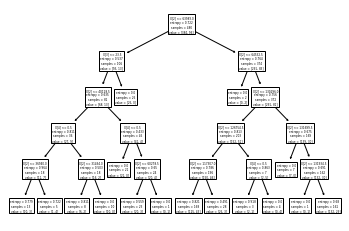

In [51]:
#plot the Decision Tree
tree.plot_tree(model);

In [52]:
model.get_n_leaves()

16

In [53]:
#Predicting on test data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    117
1      3
dtype: int64

In [54]:
print('Test Data Accuracy:',np.mean(preds==y_test))

Test Data Accuracy: 0.775


In [55]:
#Predicting on Train Data
predt= model.predict(x_train)
pd.Series(predt).value_counts()

0    467
1     13
dtype: int64

In [56]:
print('Test Data Accuracy:',np.mean(predt==y_train))

Test Data Accuracy: 0.8229166666666666


In [57]:
#Classification report for y test
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87       117
           1       0.07      0.67      0.13         3

    accuracy                           0.78       120
   macro avg       0.53      0.72      0.50       120
weighted avg       0.97      0.78      0.85       120



In [58]:
X = f1.iloc[:,0:5]
Y = f1.iloc[:,5]


kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7383333333333333


In [59]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [60]:
X = f1.iloc[:,0:5]
Y = f1.iloc[:,5]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7483333333333333


In [61]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

X = f1.iloc[:,0:5]
Y = f1.iloc[:,5]

num_trees = 10
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7916666666666666


In [62]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

X = f1.iloc[:,0:5]
Y = f1.iloc[:,5]
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7933333333333332
